<a href="https://colab.research.google.com/github/Folasewa/EmoAI_facerecognition/blob/main/Copy_of_Final_EmoAI_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.5 MB/s eta 0:00:00


In [4]:
import os
from ultralytics import YOLO

In [5]:
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00


In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="jUksJerIsafXNaR1DLEz")
project = rf.workspace().project("faceemo")
model = project.version(2).model

# infer on a local image
print(model.predict("/content/907001100.jpg", confidence=40, overlap=30).json())



loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 386.5, 'y': 240.0, 'width': 505.0, 'height': 480.0, 'confidence': 0.5726426243782043, 'class': 'confusion', 'image_path': '/content/907001100.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '640', 'height': '480'}}


In [7]:
# visualize your prediction
model.predict("/content/907001100.jpg", confidence=40, overlap=30).save("prediction.jpg")


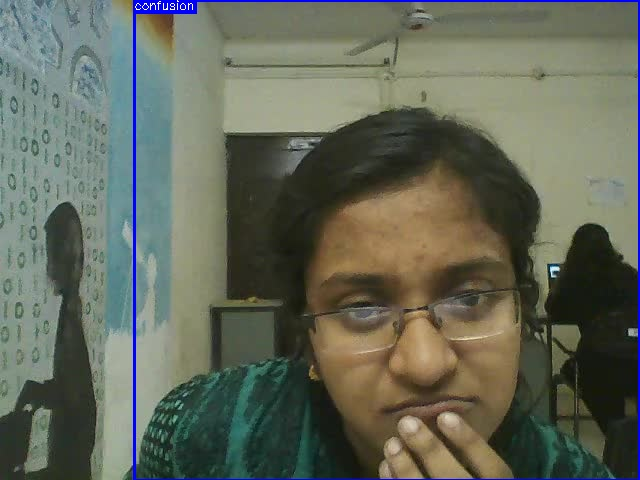

In [8]:
from IPython.display import Image
display(Image("prediction.jpg", width=600))


In [9]:
#inferring on a video
#installing ffmpeg
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=a17255fd5b7bf559180aae567f719b076598652c2a6388b5901fb0d6e3a48250
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


Creating folders for the videos

In [10]:
%cd /content/
!mkdir videos_to_infer
!mkdir inferred_videos
!mkdir videos_to_images
%cd videos_to_infer

/content
/content/videos_to_infer


In [11]:
# copy your videos from drive to /content/
!cp /content/drive/MyDrive/class_video.mp4 /content/videos_to_images

In [12]:
# break video down into images

os.environ['inputFile'] = '/content/videos_to_infer/class_video.mp4'

In [13]:
# fps value: the number of frames to sample per second from the video

!ffmpeg  -hide_banner -loglevel error -i "/content/drive/MyDrive/class_video.mp4" -vf fps=5 "$class_video_out%04d.png"

In [14]:
from roboflow import Roboflow
import json
from time import sleep
from PIL import Image, ImageDraw
import io
import base64
import requests
from os.path import exists
import os, sys, re, glob

In [22]:
engaged_count = 0
boredom_count = 0
confusion_count = 0
frustration_count = 0
distracted_count = 0

In [23]:
# HELPER FUNCTIONS BLOCK
def draw_boxes(box, x0, y0, img, class_name):
    # OPTIONAL - color map, change the key-values for each color to make the
    # class output labels specific to your dataset
    global engaged_count, boredom_count, confusion_count, frustration_count, distracted_count
    color_map = {
        "engaged":"purple",
        "boredom":"pink",
        "confusion":"orange",
        "frustration":"blue",
        "distracted": "green"
    }
    if class_name == "engaged":
        engaged_count +=1
    elif class_name == "boredom":
        boredom_count +=1
    elif class_name == "confusion":
        confusion_count +=1
    elif class_name == "frustration":
        frustration_count +=1
    else:
        distracted_count +=1
    # get position coordinates
    bbox = ImageDraw.Draw(img)

    bbox.rectangle(box, outline =color_map[class_name], width=5)
    bbox.text((x0, y0), class_name, fill='black', anchor='mm')

    return img

def save_with_bbox_renders(img):
    file_name = os.path.basename(img.filename)
    img.save('/content/inferred_videos/' + file_name)

In [16]:
# perform inference on each image from the split up video

%cd /content/inferred_videos
!pwd


/content/inferred_videos
/content/inferred_videos


In [ ]:
!pwd

/content/inferred_videos


In [17]:
%cd ..
%cd ..

/content
/


In [18]:
%cd content/videos_to_infer
!ls
%cd ..
%cd ..

/content/videos_to_infer
0001.png  0962.png  1923.png  2884.png	3845.png  4806.png  5767.png  6728.png
0002.png  0963.png  1924.png  2885.png	3846.png  4807.png  5768.png  6729.png
0003.png  0964.png  1925.png  2886.png	3847.png  4808.png  5769.png  6730.png
0004.png  0965.png  1926.png  2887.png	3848.png  4809.png  5770.png  6731.png
0005.png  0966.png  1927.png  2888.png	3849.png  4810.png  5771.png  6732.png
0006.png  0967.png  1928.png  2889.png	3850.png  4811.png  5772.png  6733.png
0007.png  0968.png  1929.png  2890.png	3851.png  4812.png  5773.png  6734.png
0008.png  0969.png  1930.png  2891.png	3852.png  4813.png  5774.png  6735.png
0009.png  0970.png  1931.png  2892.png	3853.png  4814.png  5775.png  6736.png
0010.png  0971.png  1932.png  2893.png	3854.png  4815.png  5776.png  6737.png
0011.png  0972.png  1933.png  2894.png	3855.png  4816.png  5777.png  6738.png
0012.png  0973.png  1934.png  2895.png	3856.png  4817.png  5778.png  6739.png
0013.png  0974.png  1935.png  2896.png	

In [24]:
# glob config values
!pwd
file_path = "/content/videos_to_infer"
extension = ".png"
res =[]
for path in os.listdir(file_path):
    #check if current path is a file
    if os.path.isfile(os.path.join(file_path, path)):
        res.append(os.path.join(file_path, path))
print(res)
# glob files based on location and file format
globbed_files = sorted(glob.glob(file_path + '*' + extension))
print(globbed_files)

for image in res:
  # INFERENCE
  predictions = model.predict(image).json()['predictions']
  newly_rendered_image = Image.open(image)

  # RENDER
  # for each detection, create a crop and convert into CLIP encoding
  print(predictions)
  for prediction in predictions:
      # rip bounding box coordinates from current detection
      # note: infer returns center points of box as (x,y) and width, height
      # ----- but pillow crop requires the top left and bottom right points to crop
      x0 = prediction['x'] - prediction['width'] / 2
      x1 = prediction['x'] + prediction['width'] / 2
      y0 = prediction['y'] - prediction['height'] / 2
      y1 = prediction['y'] + prediction['height'] / 2
      box = (x0, y0, x1, y1)

      newly_rendered_image = draw_boxes(box, x0, y0, newly_rendered_image, prediction['class'])

  # WRITE
  save_with_bbox_renders(newly_rendered_image)

Streaming output truncated to the last 5000 lines.
[]
[{'x': 424, 'y': 232, 'width': 848, 'height': 463, 'confidence': 0.8691385388374329, 'class': 'engaged', 'image_path': '/content/videos_to_infer/1698.png', 'prediction_type': 'ObjectDetectionModel'}]
[{'x': 420, 'y': 231, 'width': 832, 'height': 463, 'confidence': 0.6127524971961975, 'class': 'boredom', 'image_path': '/content/videos_to_infer/6749.png', 'prediction_type': 'ObjectDetectionModel'}]
[{'x': 424, 'y': 232, 'width': 845, 'height': 463, 'confidence': 0.4356282353401184, 'class': 'engaged', 'image_path': '/content/videos_to_infer/0556.png', 'prediction_type': 'ObjectDetectionModel'}]
[{'x': 424, 'y': 232, 'width': 848, 'height': 462, 'confidence': 0.5144127011299133, 'class': 'engaged', 'image_path': '/content/videos_to_infer/7224.png', 'prediction_type': 'ObjectDetectionModel'}]
[{'x': 423, 'y': 232, 'width': 846, 'height': 462, 'confidence': 0.7299138307571411, 'class': 'engaged', 'image_path': '/content/videos_to_infer/6

In [20]:
# stich images together into video
#frames = 8 however, the cells above, i used 5
#/content/drive/MyDrive/Classroom_video.mp40001.png
!pwd
!ffmpeg -r 8 -s 1920x1080 -i /content/inferred_videos/%04d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p class_video.mp4

/
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --en

In [21]:
%cd content/inferred_videos/
!ls
%cd ..
%cd ..

/content/inferred_videos
0001.png  0962.png  1923.png  2884.png	3845.png  4806.png  5767.png  6728.png
0002.png  0963.png  1924.png  2885.png	3846.png  4807.png  5768.png  6729.png
0003.png  0964.png  1925.png  2886.png	3847.png  4808.png  5769.png  6730.png
0004.png  0965.png  1926.png  2887.png	3848.png  4809.png  5770.png  6731.png
0005.png  0966.png  1927.png  2888.png	3849.png  4810.png  5771.png  6732.png
0006.png  0967.png  1928.png  2889.png	3850.png  4811.png  5772.png  6733.png
0007.png  0968.png  1929.png  2890.png	3851.png  4812.png  5773.png  6734.png
0008.png  0969.png  1930.png  2891.png	3852.png  4813.png  5774.png  6735.png
0009.png  0970.png  1931.png  2892.png	3853.png  4814.png  5775.png  6736.png
0010.png  0971.png  1932.png  2893.png	3854.png  4815.png  5776.png  6737.png
0011.png  0972.png  1933.png  2894.png	3855.png  4816.png  5777.png  6738.png
0012.png  0973.png  1934.png  2895.png	3856.png  4817.png  5778.png  6739.png
0013.png  0974.png  1935.png  2896.png	

In [25]:
sum_inference = engaged_count + boredom_count + confusion_count + frustration_count+distracted_count
engaged_percent = (engaged_count/sum_inference)*100
boredom_percent = (boredom_count/sum_inference)*100
confusion_percent = (confusion_count/sum_inference)*100
frustration_percent = (frustration_count/sum_inference)*100
distracted_percent = (distracted_count/sum_inference)*100

print(f"students were engaged {engaged_count}times which was {engaged_percent} of {sum_inference}")
print(f"students were bored {boredom_count}times which was {boredom_percent} of {sum_inference}")
print(f"students were confused {confusion_count}times which was {confusion_percent} of {sum_inference}")
print(f"students were frustrated {frustration_count}times which was {frustration_percent} of {sum_inference}")
print(f"students were distracted {distracted_count}times which was {distracted_percent} of {sum_inference}")

students were engaged 4514times which was 65.34452808338158 of 6908
students were bored 2217times which was 32.09322524609149 of 6908
students were confused 169times which was 2.446438911407064 of 6908
students were frustrated 0times which was 0.0 of 6908
students were distracted 8times which was 0.11580775911986102 of 6908
